In [2]:
import glob
import matplotlib.pyplot as plt
import numpy as np
import pickle
import tensorflow as tf
from tensorboard.backend.event_processing.event_accumulator import EventAccumulator
import argparse
import os

def get_section_results(file):
    """
        requires tensorflow==1.12.0
    """
    X = []
    Y = []
    for e in tf.compat.v1.train.summary_iterator(file):
        for v in e.summary.value:
            if v.tag == 'Train_EnvstepsSoFar':
                X.append(v.simple_value)
            elif v.tag == 'Eval_AverageReturn':
                Y.append(v.simple_value)
    return X, Y

%matplotlib inline

2022-11-02 20:10:55.053135: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


## Problem 2:

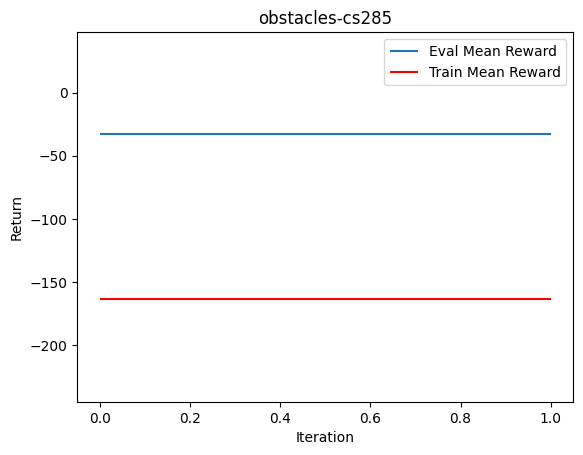

In [3]:
def gen_plot(file_prefix, best=False, title=None, _DEBUG=False, _figure=None, _grep=None):
    file_prefix = f"hw4_{file_prefix}"
    files = glob.glob(f"../../data/{file_prefix}*")
    
    if _figure:
        if _figure[0]:
            plt.figure(figsize=_figure[0])
        else:
            plt.figure()
        plt.yticks(_figure[1])
    else:
        plt.figure()
    for i, file in enumerate(files):
        if _grep and _grep not in file:
            continue
        event_acc = EventAccumulator(file) # Load the data from the event file.
        event_acc.Reload()
        if _DEBUG: print(event_acc.Tags()) # Show all tags in the log file

        arg = "Eval_AverageReturn"
        times, step_nums, vals = zip(*event_acc.Scalars(arg))
        i = file[file.index("q") + 1]
        lbl1 = file.split(f"q{i}_")[1]
        lbl2 = lbl1.split("-v")[0]
        lbl = lbl2
        
        if best:
            label="Eval Mean Reward"
            plt.hlines(max(vals), 0, 1, label=label)
            arg2 = "Train_AverageReturn"
            label="Train Mean Reward"
            times2, step_nums2, vals2 = zip(*event_acc.Scalars(arg2))
            plt.hlines(max(vals2), 0, 1, label=label, color="red")
            if i == len(files)-1: plt.title(f"{ttl1} Performance" if not title else title)
        else: plt.plot(step_nums, np.array(vals), label=lbl)
        
        plt.legend()
        ttl1 = file.split("-v")[0][1:].split("_")[-1].split(".")[0]
        if ttl1 != lbl: ttl1 += f" ({lbl})"
        if '(' in ttl1: ttl1 = ttl1[:ttl1.index('(')-1]
    else: plt.title(ttl1)
    if title: plt.title(title)
    plt.xlabel('Iteration')
    plt.ylabel('Return')
    if best:
        mi, mx = min(vals[0], vals2[0]), max(vals[-1], vals2[-1])
        plt.ylim(mi - abs(mi) // 2, mx + abs(mi)//2)
    plt.show()

gen_plot("q2_obstacles_singleiteration_", best=True)

## Problem 3:

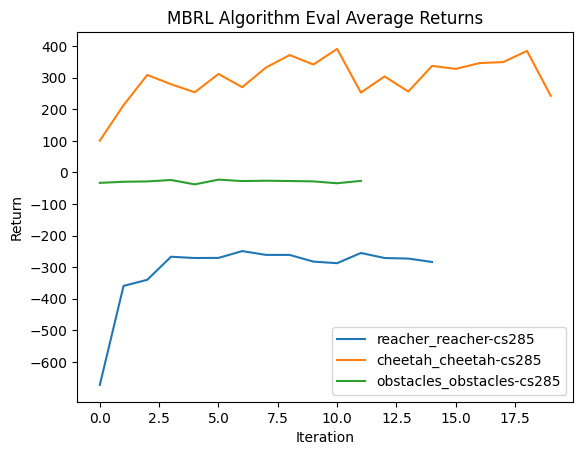

In [9]:
gen_plot("q3_", title="MBRL Algorithm Eval Average Returns", _figure=[(), np.arange(-600, 401, 100)])

## Problem 4:

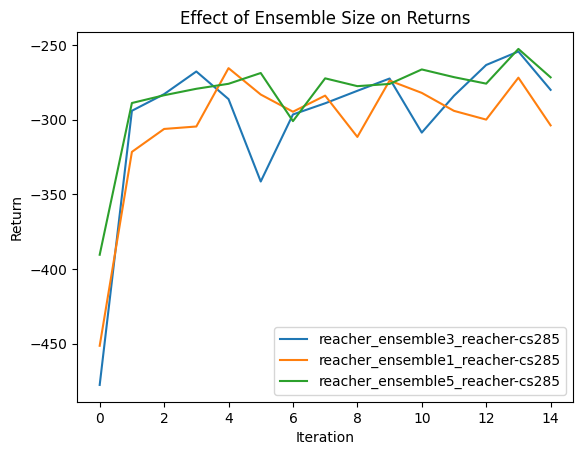

In [70]:
gen_plot("q4_", title="Effect of Ensemble Size on Returns", _grep="ensemble")

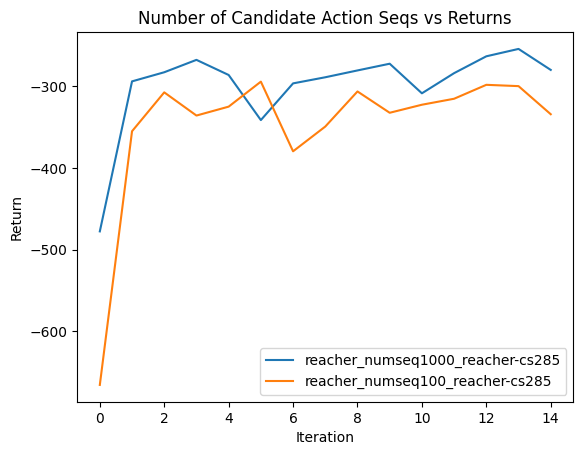

In [66]:
gen_plot("q4_", title="Number of Candidate Action Seqs vs Returns", _grep="numseq")

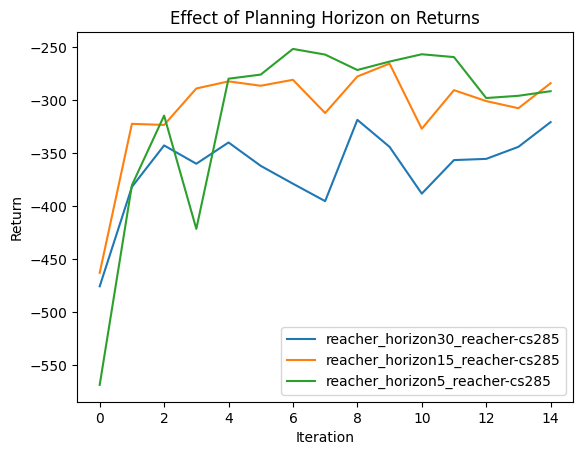

In [67]:
gen_plot("q4_", title="Effect of Planning Horizon on Returns", _grep="horizon")

## Problem 5:

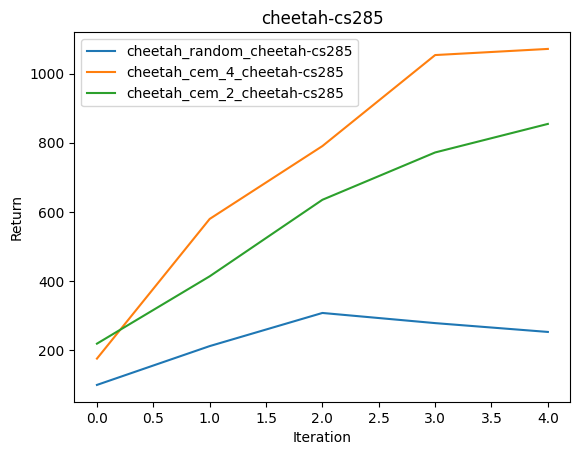

In [68]:
gen_plot("q5_")

## Q6:

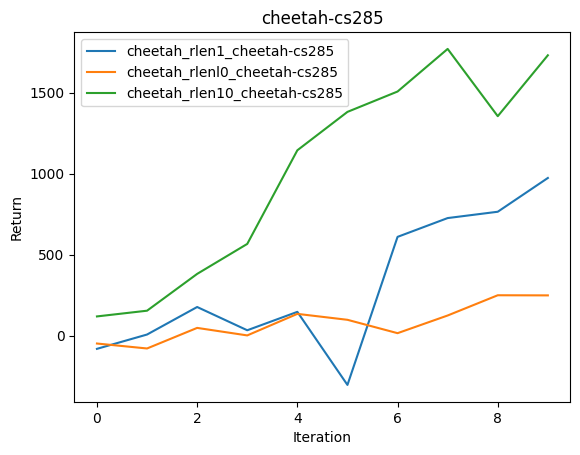

In [69]:
gen_plot("q6_")